In [1]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [2]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/MFpaper/'
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [3]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

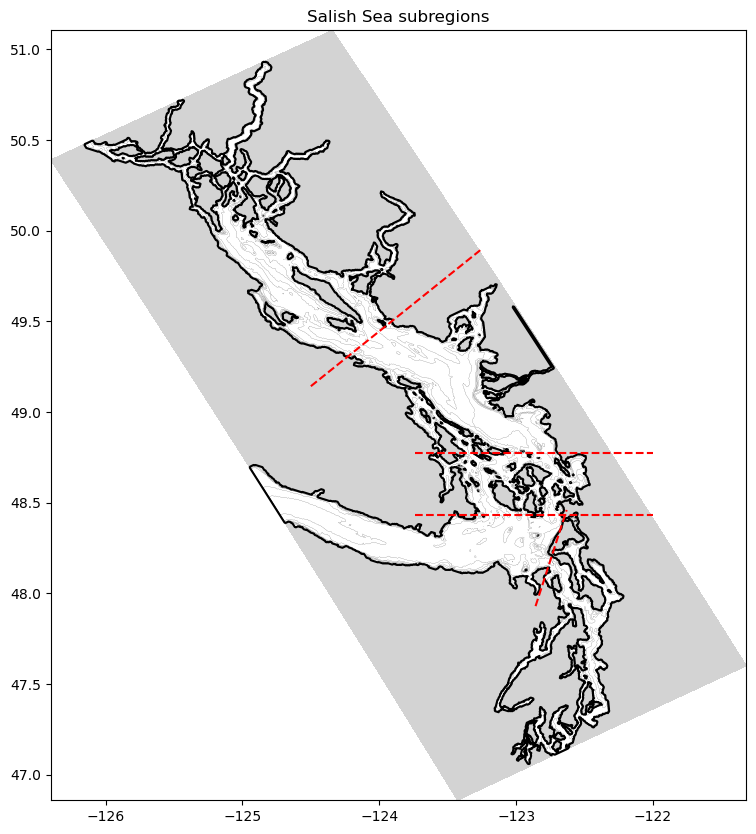

In [4]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [5]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')
Source = Source.rename(columns={'Lat': 'lat', 'Lon': 'lon'})

In [6]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}
sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG','Haro','Rosario']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)&(data['lon']<-123)]
    elif area=='Rosario':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [7]:
def cutting2(data,area):
    if area=='Puget':
        traj_keep = ((data.xs(0, level="obs").lat <48.43) & (data.xs(0, level='obs').lat <7/3* data.xs(0, level='obs').lon + 334.6))
        data_new = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
    elif area=='JdF':
        traj_keep0 = ((data.xs(0, level="obs").lat <48.43) & (data.xs(0, level='obs').lat > 7/3* data.xs(0, level='obs').lon + 334.6))
        traj_keep = ((data.xs(0, level="obs").lat >48.43) & (data.xs(0, level='obs').lat <48.774) & (data.xs(0, level='obs').lon<-124))
        data_new0 = data.loc[pd.IndexSlice[traj_keep0.index[traj_keep0], :]]
        data_new1 = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
        data_new = pd.concat([data_new0,data_new1])
    elif area=='Haro':  
        traj_keep = ((data.xs(0, level="obs").lat >48.43) & (data.xs(0, level='obs').lat <48.774) & (data.xs(0, level='obs').lon>-124) & (data.xs(0, level='obs').lon<-123) )
        data_new = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
    elif area=='Rosario':
        traj_keep = ((data.xs(0, level="obs").lat >48.43) & (data.xs(0, level='obs').lat <48.774) & (data.xs(0, level='obs').lon>-123) )
        data_new = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
    elif area=='Haro2':  
        traj_keep = ((data.xs(0, level="obs").lat >48.43) & (data.xs(0, level='obs').lat <48.774) & (data.xs(0, level='obs').lon>-124) )
        data_new = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
    elif area=='NSoG':
        traj_keep = ((data.xs(0, level="obs").lat > (20/33)*data.xs(0, level="obs").lon+124.597))
        data_new = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
    elif area=='CSSoG': 
        traj_keep = ((data.xs(0, level="obs").lat >48.774) & (data.xs(0, level="obs").lat < (20/33)*data.xs(0, level="obs").lon+124.597))
        data_new = data.loc[pd.IndexSlice[traj_keep.index[traj_keep], :]]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [8]:
area = mask.e1t*mask.e2t
puget_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_area= area.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_area = area.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_area = area.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + area.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_area={'Puget':puget_area,'JdF':jdf_area,'Haro2':haro2_area,'NSoG':NSoG_area,'CSSoG':CSSog_area}


In [9]:
volume = mask.volume*mask.tmask[0,:,:,:]
puget_vol = volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_vol= volume.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_vol = volume.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_vol = volume.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_vol = volume.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + volume.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_vol = volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_vol={'Puget':puget_vol,'JdF':jdf_vol,'Haro':haro2_vol,'NSoG':NSoG_vol,'CSSoG':CSSog_vol}



In [10]:
months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Abr':['Run_Abril20190401_.nc',92],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

In [11]:
# # ##Counting total particles exchanged compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# mean_ex = []
# std_ex = []
# for it,month in enumerate(runs):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#    # DS = DS[DS.status==1]
#     deploy_tot = Source.deploy.sum()
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count)-((np.array(depcount)+1)*deploys))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange

# np.save('exchange_array.npy',exchange_array)

In [12]:
# # ##Counting total particles exchanged compared to total lambda
# runs = {'250 s':['alpha120190101.nc',1],'500 s':['alpha_1_jan.nc',1],'1,000 s':['alpha220190101.nc',1],'2,500 s':['Runs_alpha0220190101_.nc',2],'5,000 s':['Run_Enero20190101_.nc',1],'10,000 s':['Runs_alpha0520190101_.nc',2],'50,000 s':['Runs_alpha0120190101_.nc',2]}
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(runs),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# mean_ex = []
# std_ex = []
# for it,month in enumerate(runs):
#     ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#    # DS = DS[DS.status==1]
#     deploy_tot = Source.deploy.sum()/runs[month][1]
#     meane = []
#     means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()/runs[month][1]
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count)-((np.array(depcount)+1)*deploys))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange

# np.save('exchange_lambda.npy',exchange_array)

In [13]:
# # ##Counting total particles sedimented compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# # mean_ex = []
# # std_ex = []
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==3]
#     deploy_tot = Source.deploy.sum()
#     # meane = []
#     # means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange
# np.save('sedimented_array.npy',exchange_array)

In [14]:
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# Export = []
# deploy_tot = Source.deploy.sum()
# for month in months:
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==5]
#     depcount = 1+((np.max(DS.time)-np.min(DS.time))/3600)//10
#     Export.append(len(set(DS.lat))/(deploy_tot*depcount))


In [15]:

# print('Mean % exported everyday PO  from ', np.mean(Export)*100)
# print('Std % Exported everyday to PO from ', np.std(Export)*100)

In [16]:
# # ##Counting total particles suspended compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months)])
# exchange_array[:,:] = np.nan
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DSn = DS[DS.status==3]
#     deploy_tot = Source.deploy.sum()
#     depcount = []
#     count = []
#     for i in range(sizeds):
#         times= np.min(DSn.time)+i*6*3600
#         depcount.append((times/3600)//10)
#         count.append(len(DSn[DSn.time == times]))
#         exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#     exchange_array[:sizeds,it]=exchange
# np.save('sedimented_all.npy',exchange_array)

In [17]:
# # ##Counting total particles Exported compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# # mean_ex = []
# # std_ex = []
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==5]
#     deploy_tot = Source.deploy.sum()
#     # meane = []
#     # means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange
# np.save('Exported_array.npy',exchange_array)

In [18]:
# # ##Counting total particles Exported compared to total 
# runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}
# Source['deploy']=round((Source.Population*250*10)/1e7,0)
# exchange_array=np.empty([125,len(runs),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# # mean_ex = []
# # std_ex = []
# for it,month in enumerate(runs):
#     ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==5]
#     deploy_tot = Source.deploy.sum()/runs[month][1]
#     # meane = []
#     # means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()/runs[month][1]
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange
# np.save('Exported_lambdas.npy',exchange_array)

In [19]:
# # ##Counting total particles suspended compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months)])
# exchange_array[:,:] = np.nan
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DSn = DS[DS.status==1]
#     deploy_tot = Source.deploy.sum()
#     depcount = []
#     count = []
#     for i in range(sizeds):
#         times= np.min(DSn.time)+i*6*3600
#         depcount.append((times/3600)//10)
#         count.append(len(DSn[DSn.time == times]))
#         exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#     exchange_array[:sizeds,it]=exchange
# np.save('suspended_all.npy',exchange_array)

In [20]:
# # ##Counting total particles suspended in water column compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# # mean_ex = []
# # std_ex = []
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==1]
#     deploy_tot = Source.deploy.sum()
#     # meane = []
#     # means = []
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange
# np.save('suspend_array.npy',exchange_array)

In [21]:
# # ##Counting total particles beached compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months)])
# exchange_array[:,:] = np.nan
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DSn = DS[DS.status==2]
#     deploy_tot = Source.deploy.sum()
#     depcount = []
#     count = []
#     for i in range(sizeds):
#         times= np.min(DSn.time)+i*6*3600
#         depcount.append((times/3600)//10)
#         count.append(len(DSn[DSn.time == times]))
#         exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#     exchange_array[:sizeds,it]=exchange
# np.save('beached_all.npy',exchange_array)

In [22]:
# # ##Counting total particles beached compared to total 
# Source['deploy']=round((Source.Population*250*10)/5e6,0)
# exchange_array=np.empty([125,len(months),len(sub_areas)])
# exchange_array[:,:,:] = np.nan
# for it,month in enumerate(months):
#     ds = xr.open_dataset(path_runs+months[month][0], decode_times=False)
#     sizeds = ds.dims['obs']-1
#     x = np.linspace(0,31,sizeds)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==2]
#     deploy_tot = Source.deploy.sum()
#     for j,area in enumerate(sub_areas):
#         DSn = cutting(DS,area)
#         deploys = cutting(Source,area).deploy.sum()
#         count = []
#         depcount = []
#         for i in range(sizeds):
#             times= np.min(DSn.time)+i*6*3600
#             depcount.append((times/3600)//10)
#             count.append(len(DSn[DSn.time == times]))
#             exchange = (np.array(count))/(deploy_tot*(np.array(depcount)+1))
#         exchange_array[:sizeds,it,j]=exchange
# np.save('beached_array.npy',exchange_array)

In [23]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth.
    Parameters:
        lat1, lon1: Latitude and longitude of point 1 in decimal degrees.
        lat2, lon2: Latitude and longitude of point 2 in decimal degrees.
    Returns:
        Distance in kilometers.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    r = 6371000 # Radius of Earth in kilometers
    return r * c

In [24]:
# runs = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Apr':['Run_Abril20190401_.nc',91],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

# travel_all = np.zeros([len(runs),len(sub_areas),260000])
# for ii,months in enumerate(runs):
#     print(months)
#     ds = xr.open_dataset(path_runs+runs[months][0], decode_times=False)
#     x = np.linspace(0,31,ds.dims['obs']-1)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     for j,area in enumerate(sub_areas):
#         DSn = cutting2(DS,area)
#         dist_travel = []
#         for i in DSn.index.get_level_values('trajectory').unique():
#             try: leni = len(DSn.lat[i])
#             except KeyError:
#                 break
#             dist_travel.append(haversine(DSn.lat[i][0],DSn.lon[i][0],DSn.lat[i][leni-1],DSn.lon[i][leni-1]))
#         travel_all[ii,j,:len(dist_travel)]=dist_travel
# np.save('distance_travelled_array.npy',np.array(travel_all))

In [25]:
# runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

# travel_all = np.zeros([len(runs),len(sub_areas),260000])
# for ii,months in enumerate(runs):
#     print(months)
#     ds = xr.open_dataset(path_runs+runs[months][0], decode_times=False)
#     x = np.linspace(0,31,ds.dims['obs']-1)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     for j,area in enumerate(sub_areas):
#         DSn = cutting2(DS,area)
#         dist_travel = []
#         for i in DSn.index.get_level_values('trajectory').unique():
#             try: leni = len(DSn.lat[i])
#             except KeyError:
#                 break
#             dist_travel.append(haversine(DSn.lat[i][0],DSn.lon[i][0],DSn.lat[i][leni-1],DSn.lon[i][leni-1]))
#         travel_all[ii,j,:len(dist_travel)]=dist_travel
# np.save('distance_travelled_lambda.npy',np.array(travel_all))

In [26]:
#sub = [0, 1, 2, 3, 4]
#exchange_array_new.shape
exchange_array=np.load('distance_travelled_lambda.npy')
exchange_array.shape
exchange_array_new = np.transpose(exchange_array, (2, 0, 1))
np.save('distance_travelled_lambda2.npy',np.array(exchange_array_new))

In [27]:
# #sub = [0, 1, 2, 3, 4]
# #exchange_array_new.shape
# exchange_array=np.load('distance_travelled_array.npy')
# exchange_array.shape
# array2 = np.transpose(exchange_array, (2, 0, 1))
# #np.save('distance_travelled_array2.npy',np.array(exchange_array_new))

In [28]:
import numpy as np
exchange_array=np.load('distance_travelled_array2.npy')
sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']

for i,sub_areass in enumerate(sub_areas):
    print('Mean water column from '+sub_areass, np.nanmean(exchange_array[:,:,i].flatten())/1000)
    print('Std water column from '+sub_areass, np.nanstd(exchange_array[:,:,i].flatten())/1000)

Mean water column from Puget 2.6265722860830767
Std water column from Puget 5.78359261957516
Mean water column from JdF 1.4161382726011869
Std water column from JdF 8.396631784369365
Mean water column from Haro 0.21290994563990887
Std water column from Haro 2.659771015470901
Mean water column from NSoG 0.20468619245443873
Std water column from NSoG 2.4540694352628405
Mean water column from CSSoG 5.145372488863317
Std water column from CSSoG 10.687817300950906


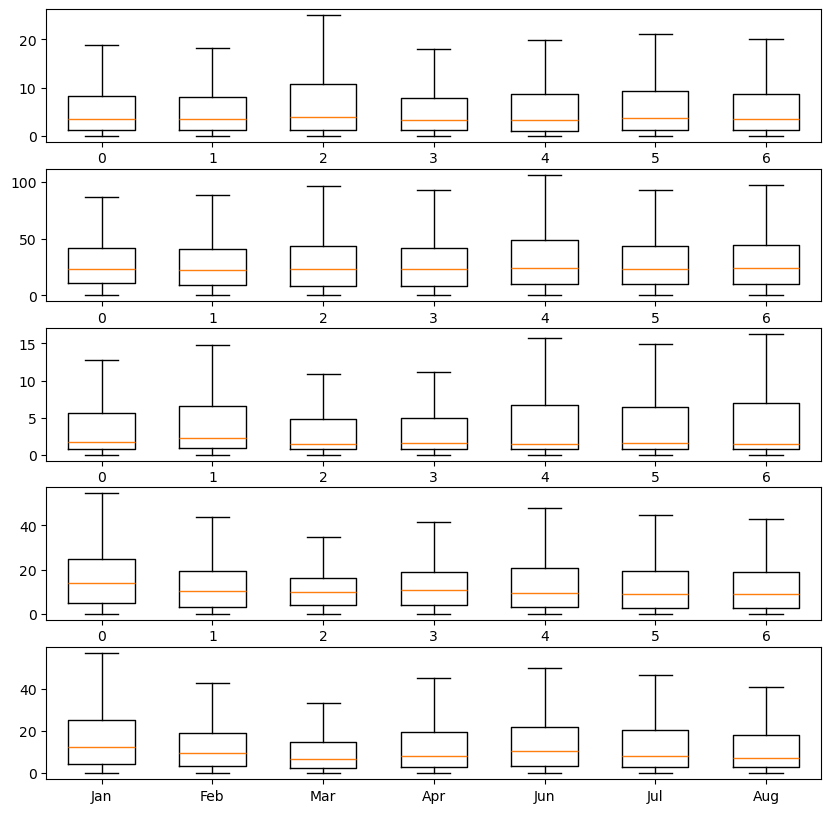

In [29]:
fig,axs = plt.subplots(5,1,figsize=(10,10))
for j,sub_areass in enumerate(sub_areas):
    for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
        data = exchange_array[:,i,j]/1000
        data = data[data>0]   
        axs[j].boxplot(data, positions=[i], widths=0.6,showfliers=False)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

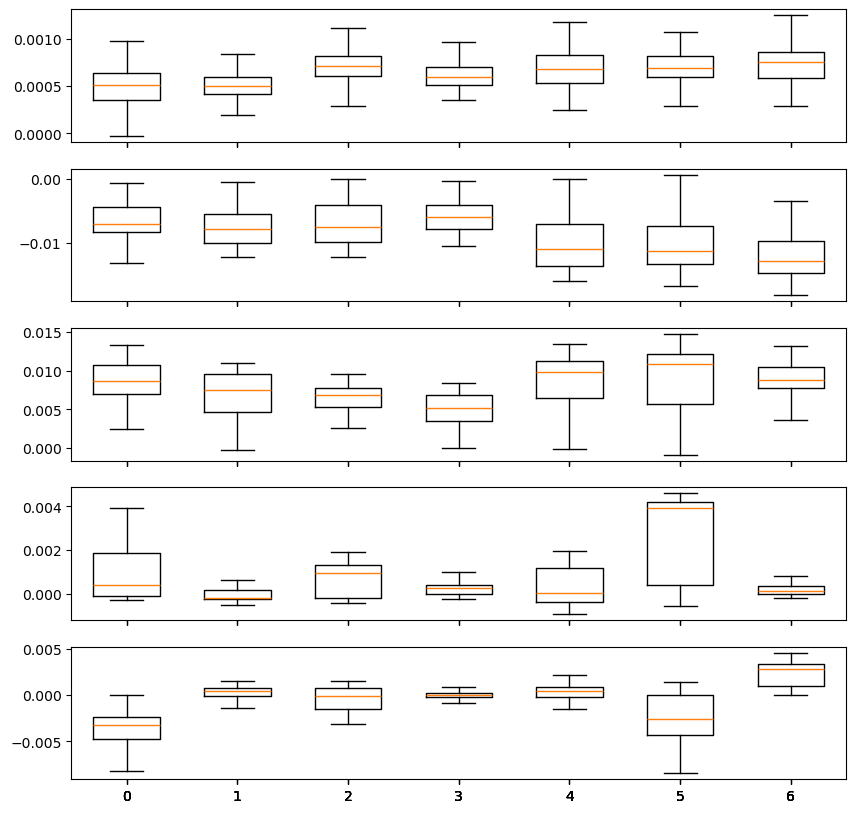

In [30]:
array1 = np.load('exchange_array.npy')
n_months = 7
fig, ax = plt.subplots(5, 1,
                        figsize=(10, 10),
                        sharex='col')  # share x-axis per column
for r, region_name in enumerate(sub_areas): # row = variable, column = region
    for m in range(n_months):
        data = array1[:,m, r]
        data = data[~np.isnan(data)]
        ax[r].boxplot(data, positions=[m], widths=0.6, showfliers=False)

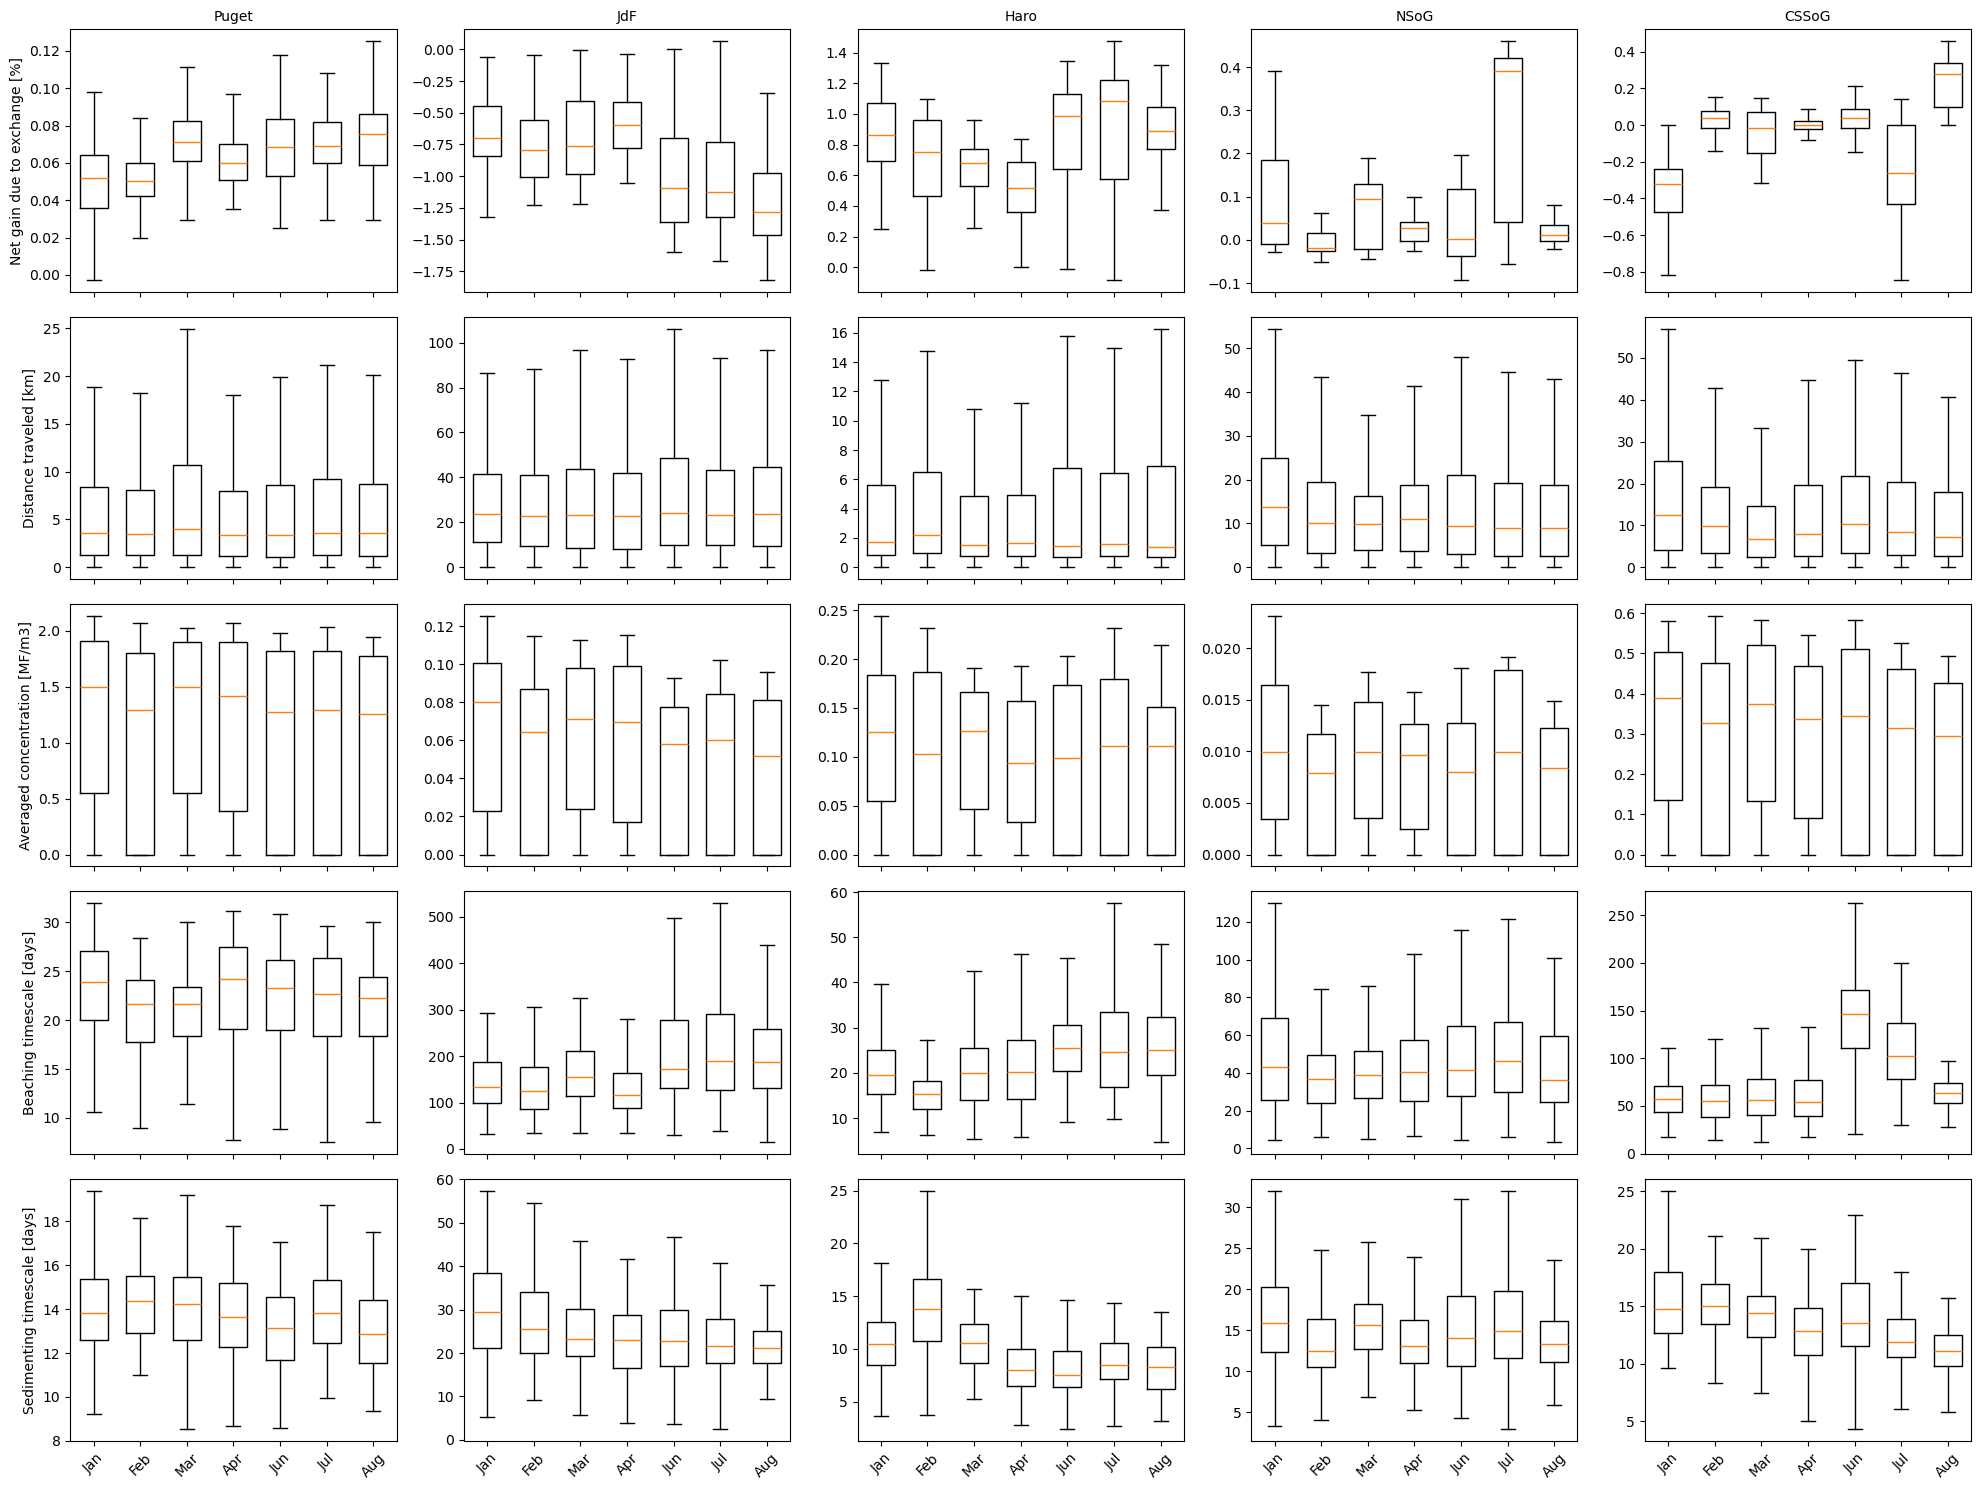

In [31]:
array1 = np.load('exchange_array.npy')*100
array2 = np.load('distance_travelled_array2.npy')/1000
array3 = np.load('suspended_months2.npy')*1e7
array4 = np.load('beached_months2.npy')
array5 = np.load('sediments_months2.npy')

data_arrays = [array1, array2, array3, array4,array5]
variables = ['Net gain due to exchange [%]', 'Distance traveled [km]', 'Averaged concentration [MF/m3]', 'Beaching timescale [days]','Sedimenting timescale [days]']
months = ['Jan','Feb','Mar','Apr','Jun','Jul','Aug']

n_months = len(months)
n_vars = len(data_arrays)
n_regions = len(sub_areas)

fig, axs = plt.subplots(n_vars, n_regions,
                        figsize=(4*n_regions, 3*n_vars),
                        sharex='col')  # share x-axis per column

# Ensure axs is 2D
if n_vars == 1:
    axs = np.expand_dims(axs, 0)
if n_regions == 1:
    axs = np.expand_dims(axs, 1)

for v, var_array in enumerate(data_arrays):
    for r, region_name in enumerate(sub_areas):

        ax = axs[v, r]  # row = variable, column = region

        for m in range(n_months):
            data = var_array[:,m, r]
            if v == 1 or v == 3 or v == 4:
                data = data[data>0]
            
            data = data[~np.isnan(data)]
            ax.boxplot(data, positions=[m], widths=0.6, showfliers=False)

        # bottom row gets month labels
        if v == n_vars - 1:
            ax.set_xticks(range(n_months))
            ax.set_xticklabels(months, rotation=45)
        else:
            ax.set_xticks(range(n_months))
            ax.set_xticklabels([])

        # y-label per row (variable names)
        if r == 0:
            ax.set_ylabel(variables[v])

        # column title = region names
        if v == 0:
            ax.set_title(region_name, fontsize=10)

plt.tight_layout()
plt.show()


In [32]:
array3.shape

(150, 7, 5)

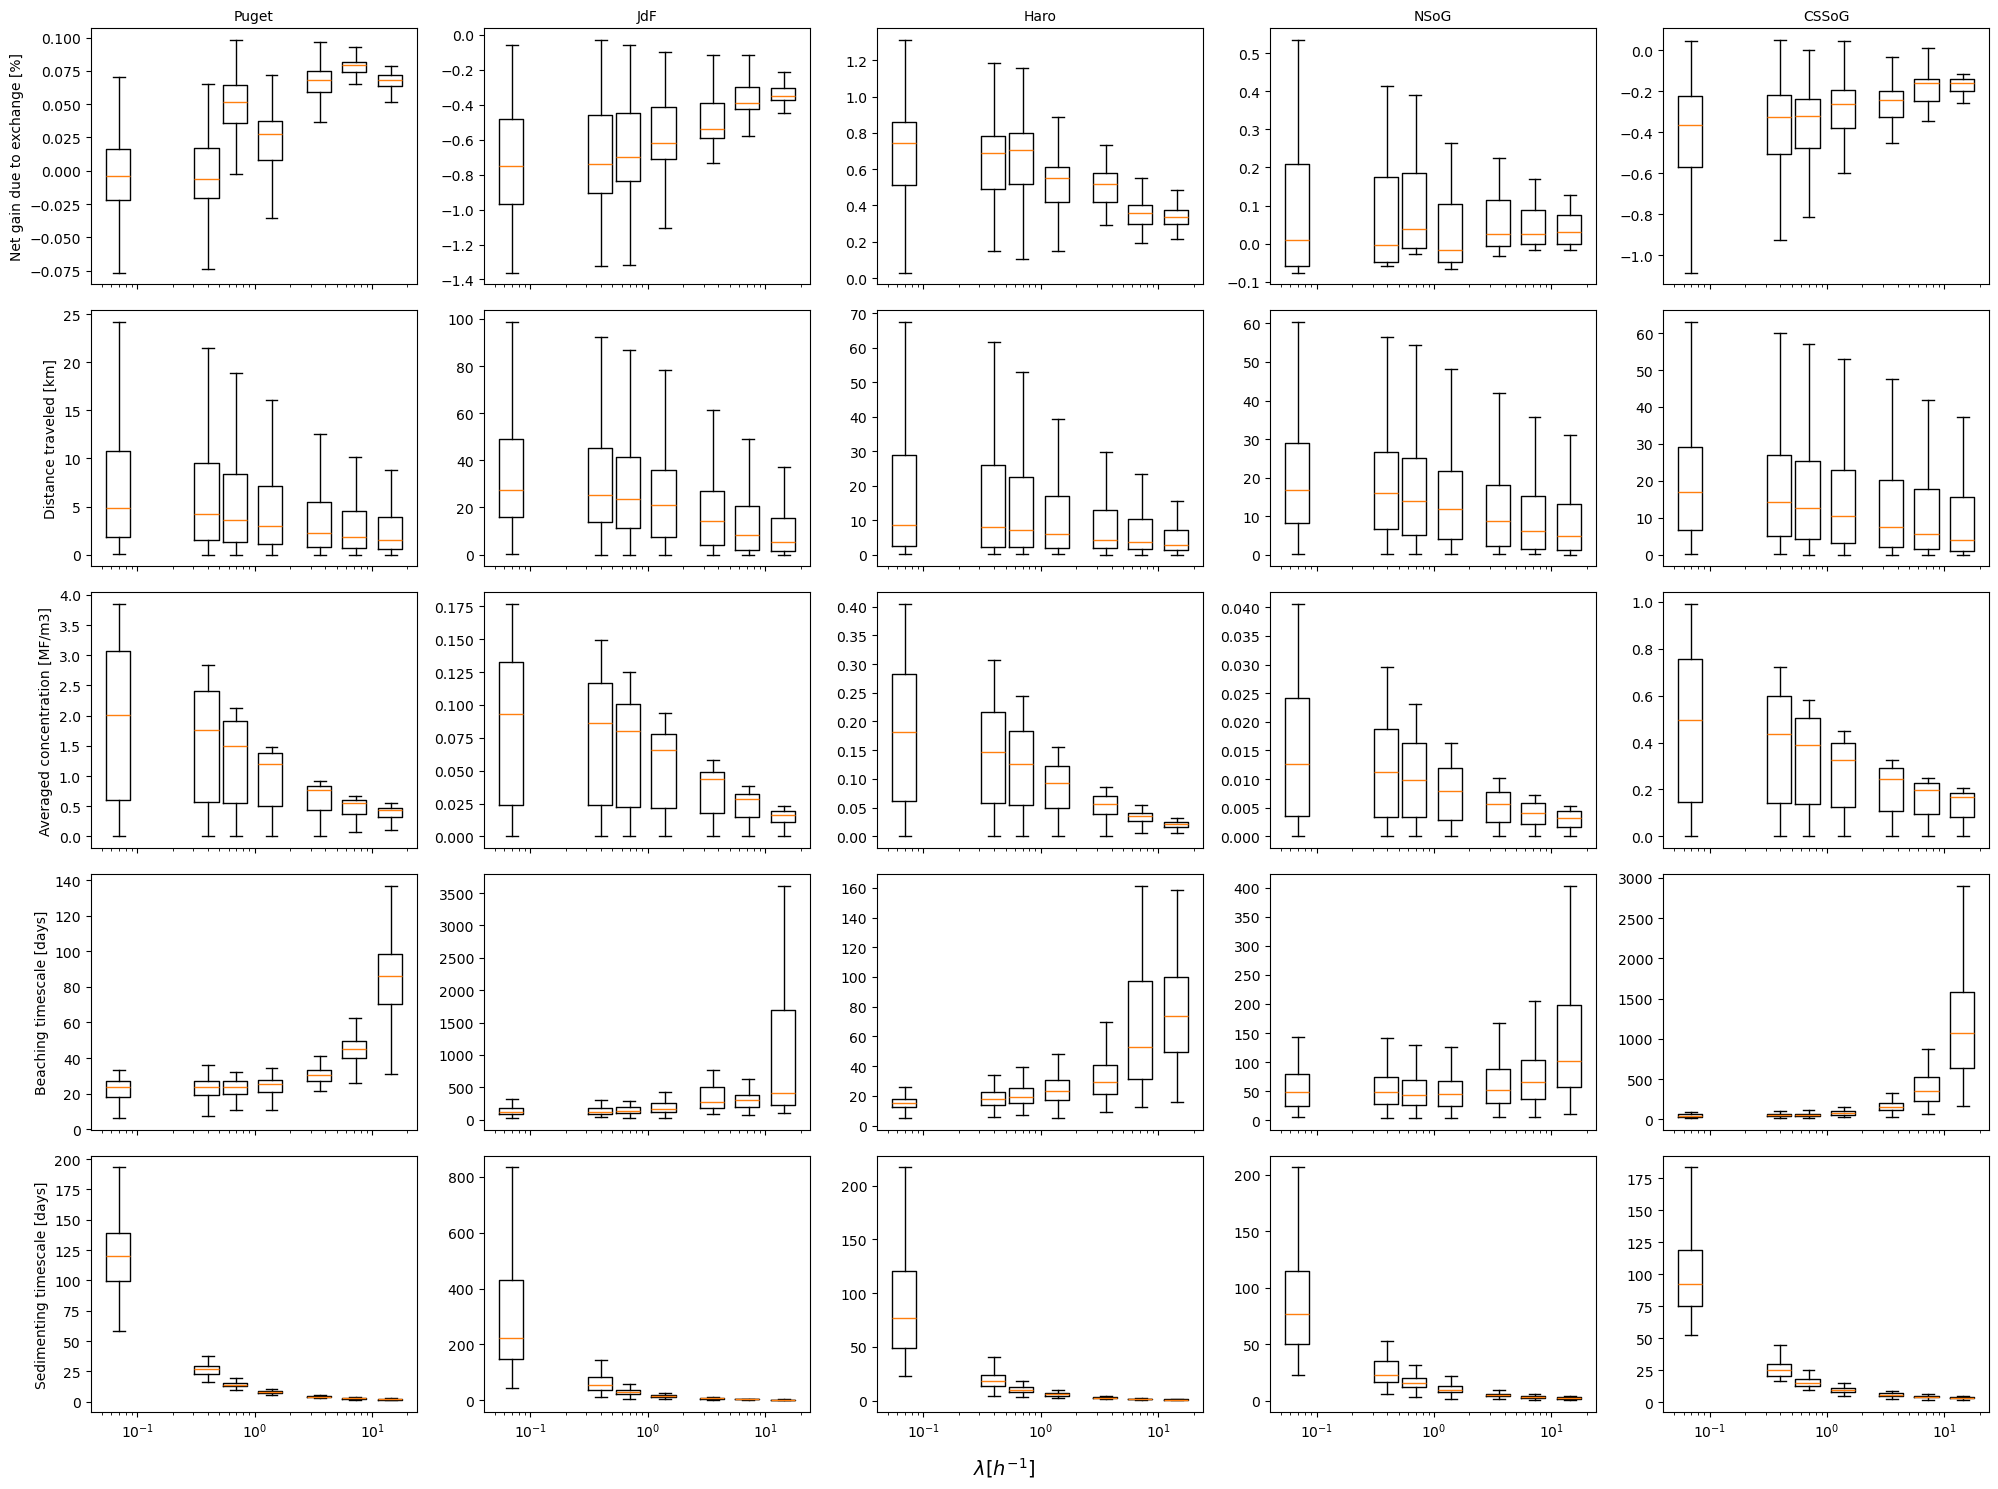

In [33]:
array1 = np.load('exchange_lambda.npy')*100
array2 = np.load('distance_travelled_lambda2.npy')/1000
array3 = np.load('suspended_lambdas.npy')*2e7
array4 = np.load('beached_lambdas.npy')
array5 = np.load('sediments_lambdas.npy')

data_arrays = [array1, array2, array3, array4,array5]
variables = ['Net gain due to exchange [%]', 'Distance traveled [km]', 'Averaged concentration [MF/m3]', 'Beaching timescale [days]','Sedimenting timescale [days]']
#months = ['Jan','Feb','Mar','Apr','Jun','Jul','Aug']

lambdas = {'180 s':14.5,'360 s':7.23,'720 s':3.6,'1,800 s':1.4,'3,600 s':0.7,'6,120 s':0.4,'36,000 s':0.07}
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
w = 0.2
n_months = len(lambdas)
n_vars = len(data_arrays)
n_regions = len(sub_areas)

fig, axs = plt.subplots(n_vars, n_regions,
                        figsize=(4*n_regions, 3*n_vars),
                        sharex='col')  # share x-axis per column

# Ensure axs is 2D
if n_vars == 1:
    axs = np.expand_dims(axs, 0)
if n_regions == 1:
    axs = np.expand_dims(axs, 1)

for v, var_array in enumerate(data_arrays):
    for r, region_name in enumerate(sub_areas):

        ax = axs[v, r]  # row = variable, column = region

        for m,im in enumerate(lambdas):
            data = var_array[:,m, r]
            if v == 1 or v == 3 or v == 4:
                data = data[data>0]
            
            data = data[~np.isnan(data)]
            ax.boxplot(data, positions=[lambdas[im]], widths=width(lambdas[im],w), showfliers=False)
            ax.set_xscale('log')
            #ax.set_xlim(14,0.01)

        # bottom row gets month labels
        if v == n_vars - 1:
            pass

        else:
            #ax.set_xticks(np.array(list(lambdas.values())))
            ax.set_xticklabels([])

        # y-label per row (variable names)
        if r == 0:
            ax.set_ylabel(variables[v])

        # column title = region names
        if v == 0:
            #ax.axhline(y=0)
            ax.set_title(region_name, fontsize=10)
fig.supxlabel(r'$\lambda [h^{-1}]$', fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()


In [34]:
array3 = np.load('suspended_months2.npy') * 1e7

w_array3 = np.zeros([array3.shape[0],array3.shape[1]])
for i in range(7):
    total_vol = 0
    for j,areas in enumerate(sub_areas):
        total_vol+= sub_areas_vol[areas].values
        w_array3[:,i] += array3[:,i,j]*sub_areas_vol[areas].values
    w_array3[:,i] = w_array3[:,i]/total_vol


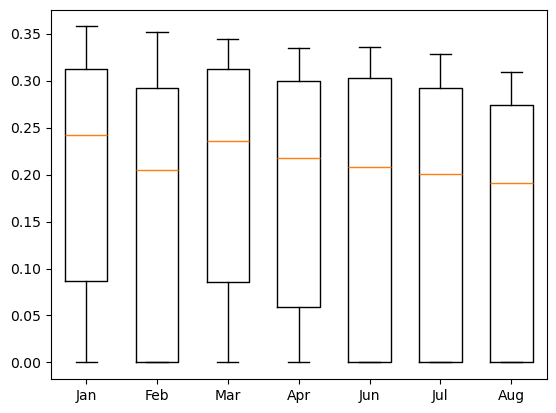

In [35]:
for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
    data = w_array3[:,i]
    data = data[~np.isnan(data)]          # remove invalid values
    plt.boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

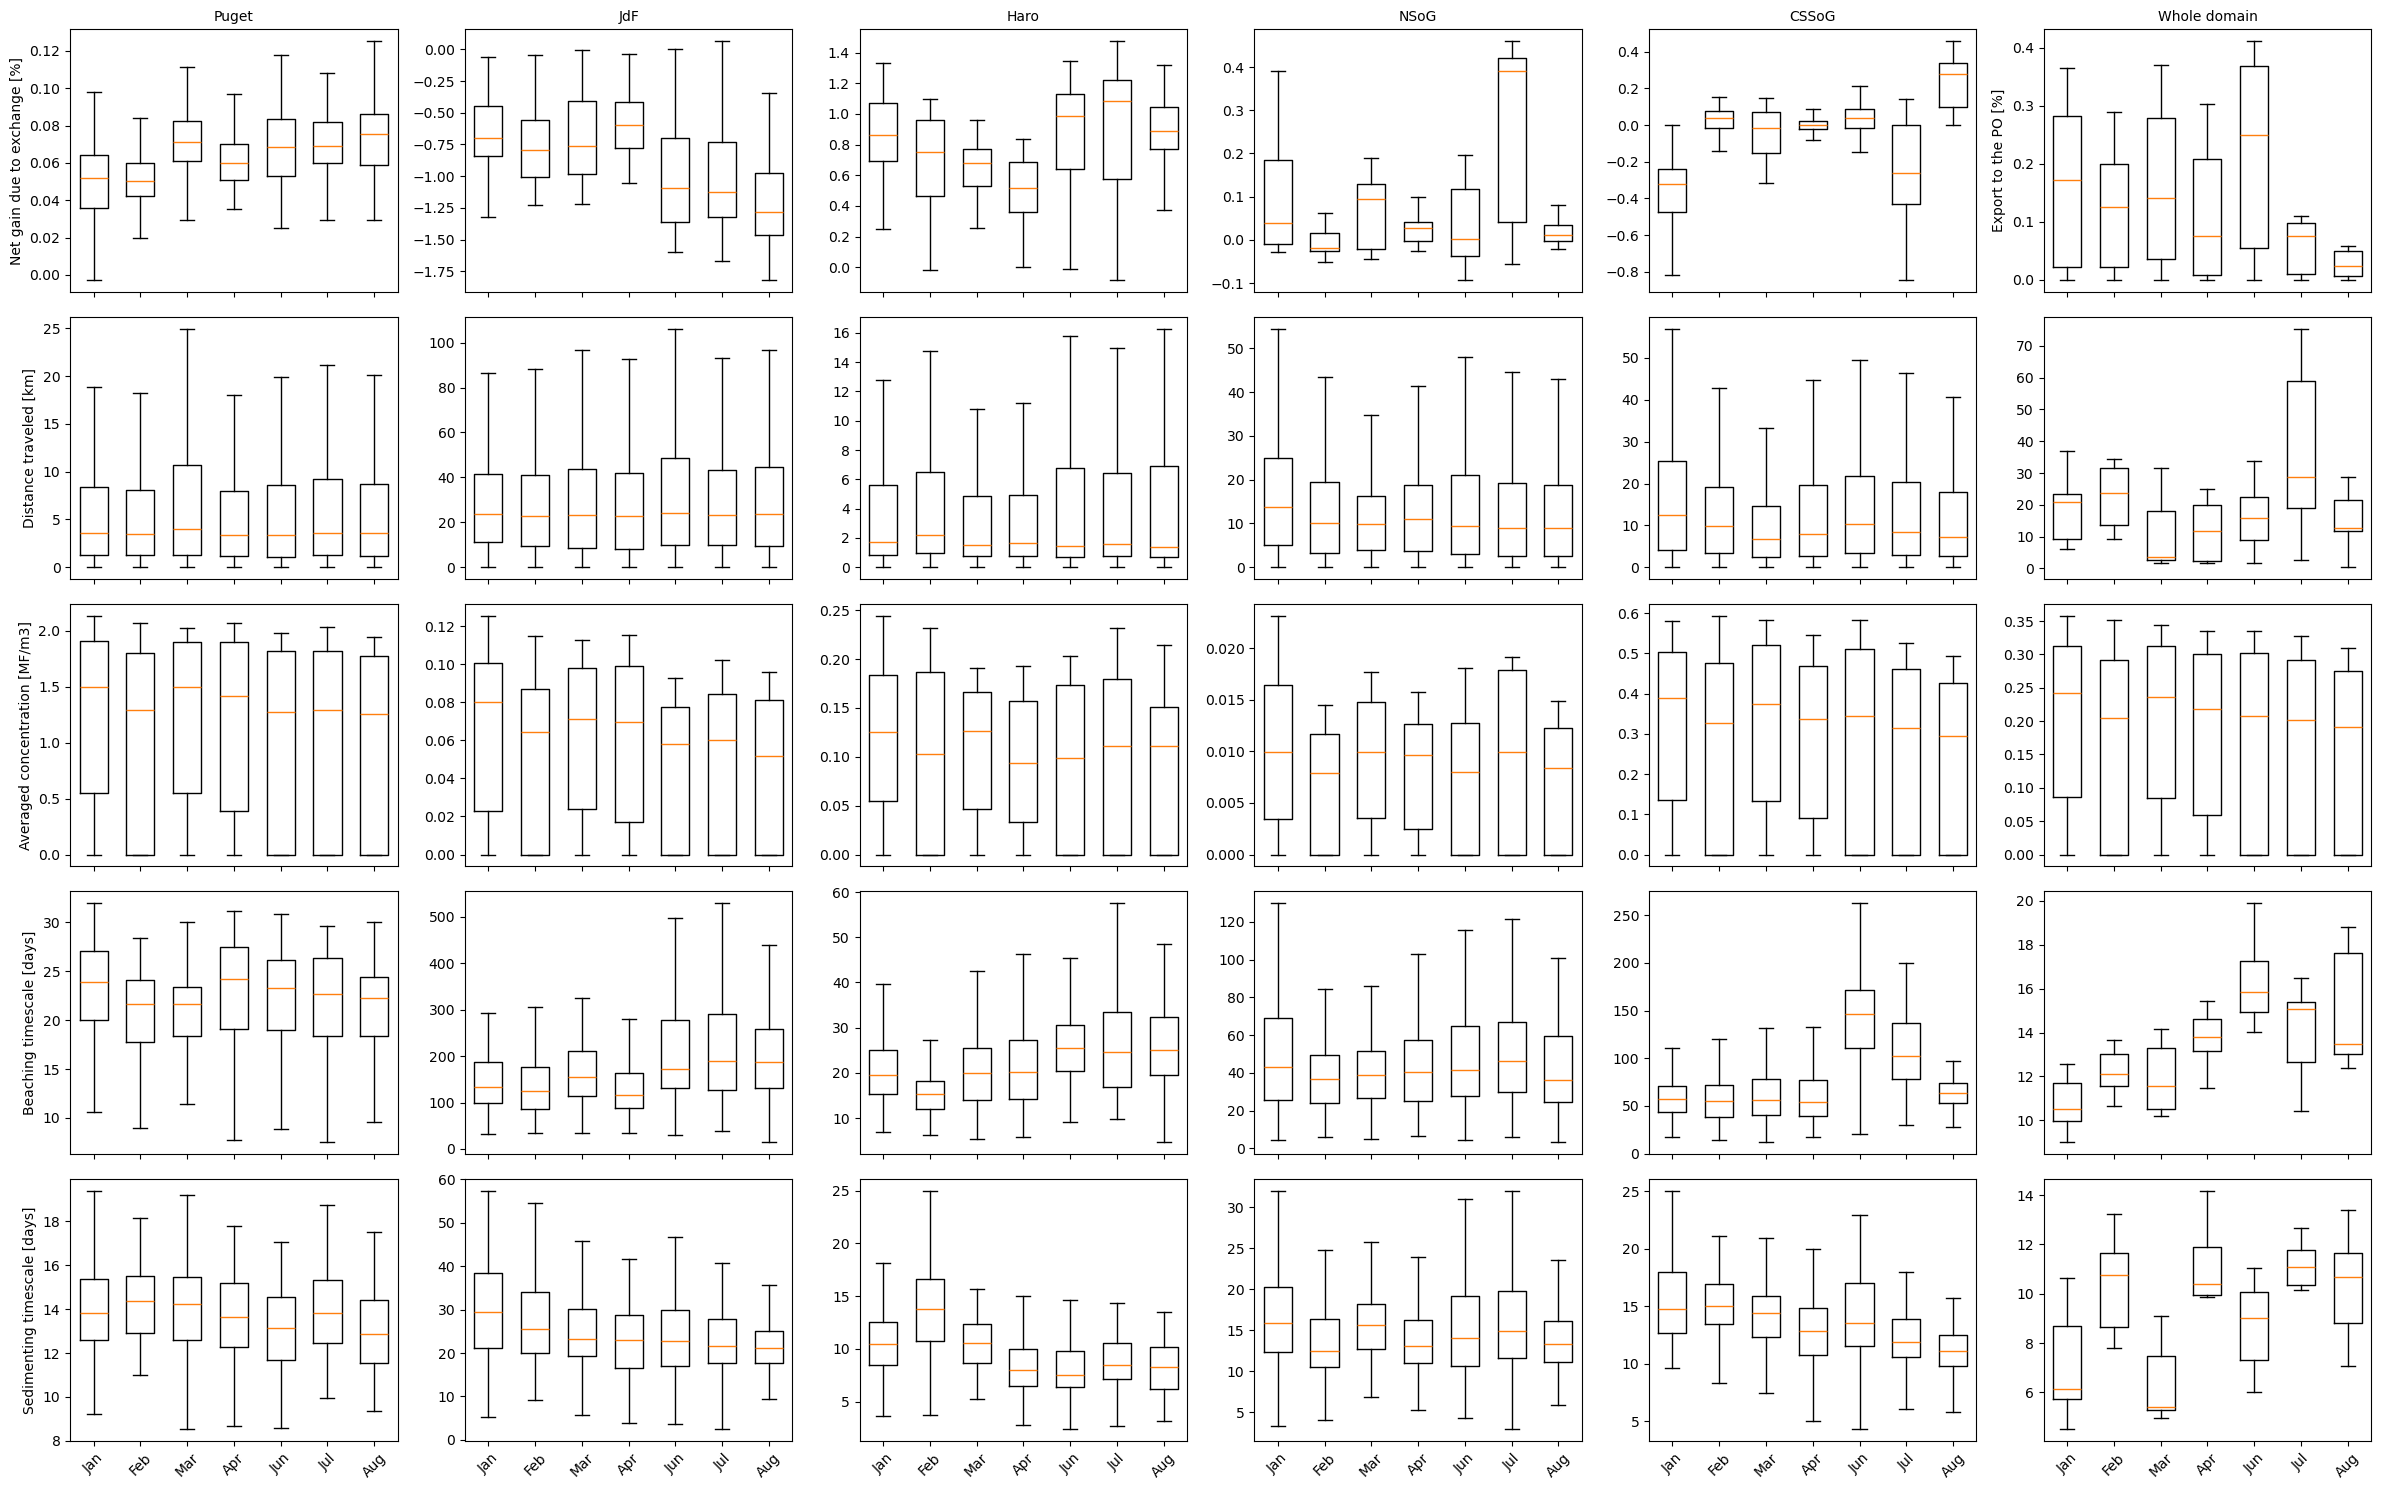

In [36]:
# ----------------------------
# Load REGION arrays
# ----------------------------
array1 = np.load('exchange_array.npy') * 100
array2 = np.load('distance_travelled_array2.npy') / 1000
array3 = np.load('suspended_months2.npy') * 1e7
array4 = np.load('beached_months2.npy')
array5 = np.load('sediments_months2.npy')

data_arrays = [array1, array2, array3, array4, array5]

variables = [
    'Net gain due to exchange [%]',
    'Distance traveled [km]',
    'Averaged concentration [MF/m3]',
    'Beaching timescale [days]',
    'Sedimenting timescale [days]'
]

months = ['Jan','Feb','Mar','Apr','Jun','Jul','Aug']

# ----------------------------
# Load WHOLE-DOMAIN arrays
# ----------------------------
w_array1 = np.load('Exported_array.npy')[:,:,1]* 100 #Select JdF box(only with non zero)
w_array2 = np.load('distance_travelled.npy') / 1000
#w_array3 = np.load('suspended_months.npy') * 1e7
w_array4 = np.load('beached_months.npy')
w_array5 = np.load('sediments_months.npy')

domain_arrays = [w_array1, w_array2, w_array3, w_array4, w_array5]

# ----------------------------
# Plotting setup
# ----------------------------
n_months = len(months)
n_vars = len(data_arrays)
n_regions = len(sub_areas)

# one extra column at index 0 for whole-domain
fig, axs = plt.subplots(
    n_vars, n_regions + 1,
    figsize=(4*(n_regions+1), 3*n_vars),
    sharex="col"
)

# ensure 2D
if n_vars == 1:
    axs = np.expand_dims(axs, 0)
if n_regions + 1 == 1:
    axs = np.expand_dims(axs, 1)

# ----------------------------
# 1) Plot WHOLE-DOMAIN in column 0
# ----------------------------
for v, whole_array in enumerate(domain_arrays):

    ax = axs[v, 5]   # col 0 reserved for whole domain

    for m in range(n_months):
        data = whole_array[:, m]

        if v in (1, 3, 4):
            data = data[data > 0]

        data = data[~np.isnan(data)]

        ax.boxplot(data, positions=[m], widths=0.6, showfliers=False)
    if v==0:
        ax.set_ylabel('Export to the PO [%]')
    # title for whole-domain column
    if v == 0: 
        ax.set_title("Whole domain", fontsize=10)

# ----------------------------
# 2) Plot REGIONAL data in columns 1…N
# ----------------------------
for v, var_array in enumerate(data_arrays):
    for r, region_name in enumerate(sub_areas):

        ax = axs[v, r]   # shift by +1 to leave column 0 for domain

        for m in range(n_months):
            data = var_array[:, m, r]

            if v in (1, 3, 4):
                data = data[data > 0]

            data = data[~np.isnan(data)]

            ax.boxplot(data, positions=[m], widths=0.6, showfliers=False)
        if r==0:
            ax.set_ylabel(variables[v])
        # column titles only on top row
        if v == 0:
            ax.set_title(region_name, fontsize=10)

# ----------------------------
# X-labels only on bottom row
# ----------------------------
for r in range(n_regions + 1):
    ax = axs[-1, r]
    ax.set_xticks(range(n_months))
    ax.set_xticklabels(months, rotation=45)

#fig.supxlabel(r'Month', fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()
fig.savefig('seasonal_robustness1.pdf')

In [37]:
array3 = np.load('suspended_lambdas.npy') * 2e7

w_array3 = np.zeros([array3.shape[0],array3.shape[1]])
for i in range(7):
    total_vol = 0
    for j,areas in enumerate(sub_areas):
        total_vol+= sub_areas_vol[areas].values
        w_array3[:,i] += array3[:,i,j]*sub_areas_vol[areas].values
    w_array3[:,i] = w_array3[:,i]/total_vol


Puget, 2.9544463753917274
Puget, 3.3604015853175233
Puget, 4.015841693966563
Puget, 5.09989960842073
Puget, 6.022596286279595
Puget, 6.838085263494489
Puget, 7.721928786580449
JdF, 10.968280293676136
JdF, 14.489821436806533
JdF, 19.653946546874423
JdF, 26.041057207235617
JdF, 30.086074544102946
JdF, 32.53096404122196
JdF, 35.129541530461964
Haro, 6.220808038042384
Haro, 8.286038103928753
Haro, 10.117020464509695
Haro, 13.308178837756525
Haro, 15.043503757922418
Haro, 16.73989361314436
Haro, 17.31065031019664
NSoG, 8.847120628422402
NSoG, 10.365836029198821
NSoG, 12.285924474474959
NSoG, 15.164349336967208
NSoG, 17.55264561451504
NSoG, 19.07556788779441
NSoG, 20.460089098960204
CSSoG, 10.226228631217436
CSSoG, 11.46492012805585
CSSoG, 13.147522672109107
CSSoG, 15.32305411849026
CSSoG, 17.10330153389705
CSSoG, 18.465140696882028
CSSoG, 20.297693580529586


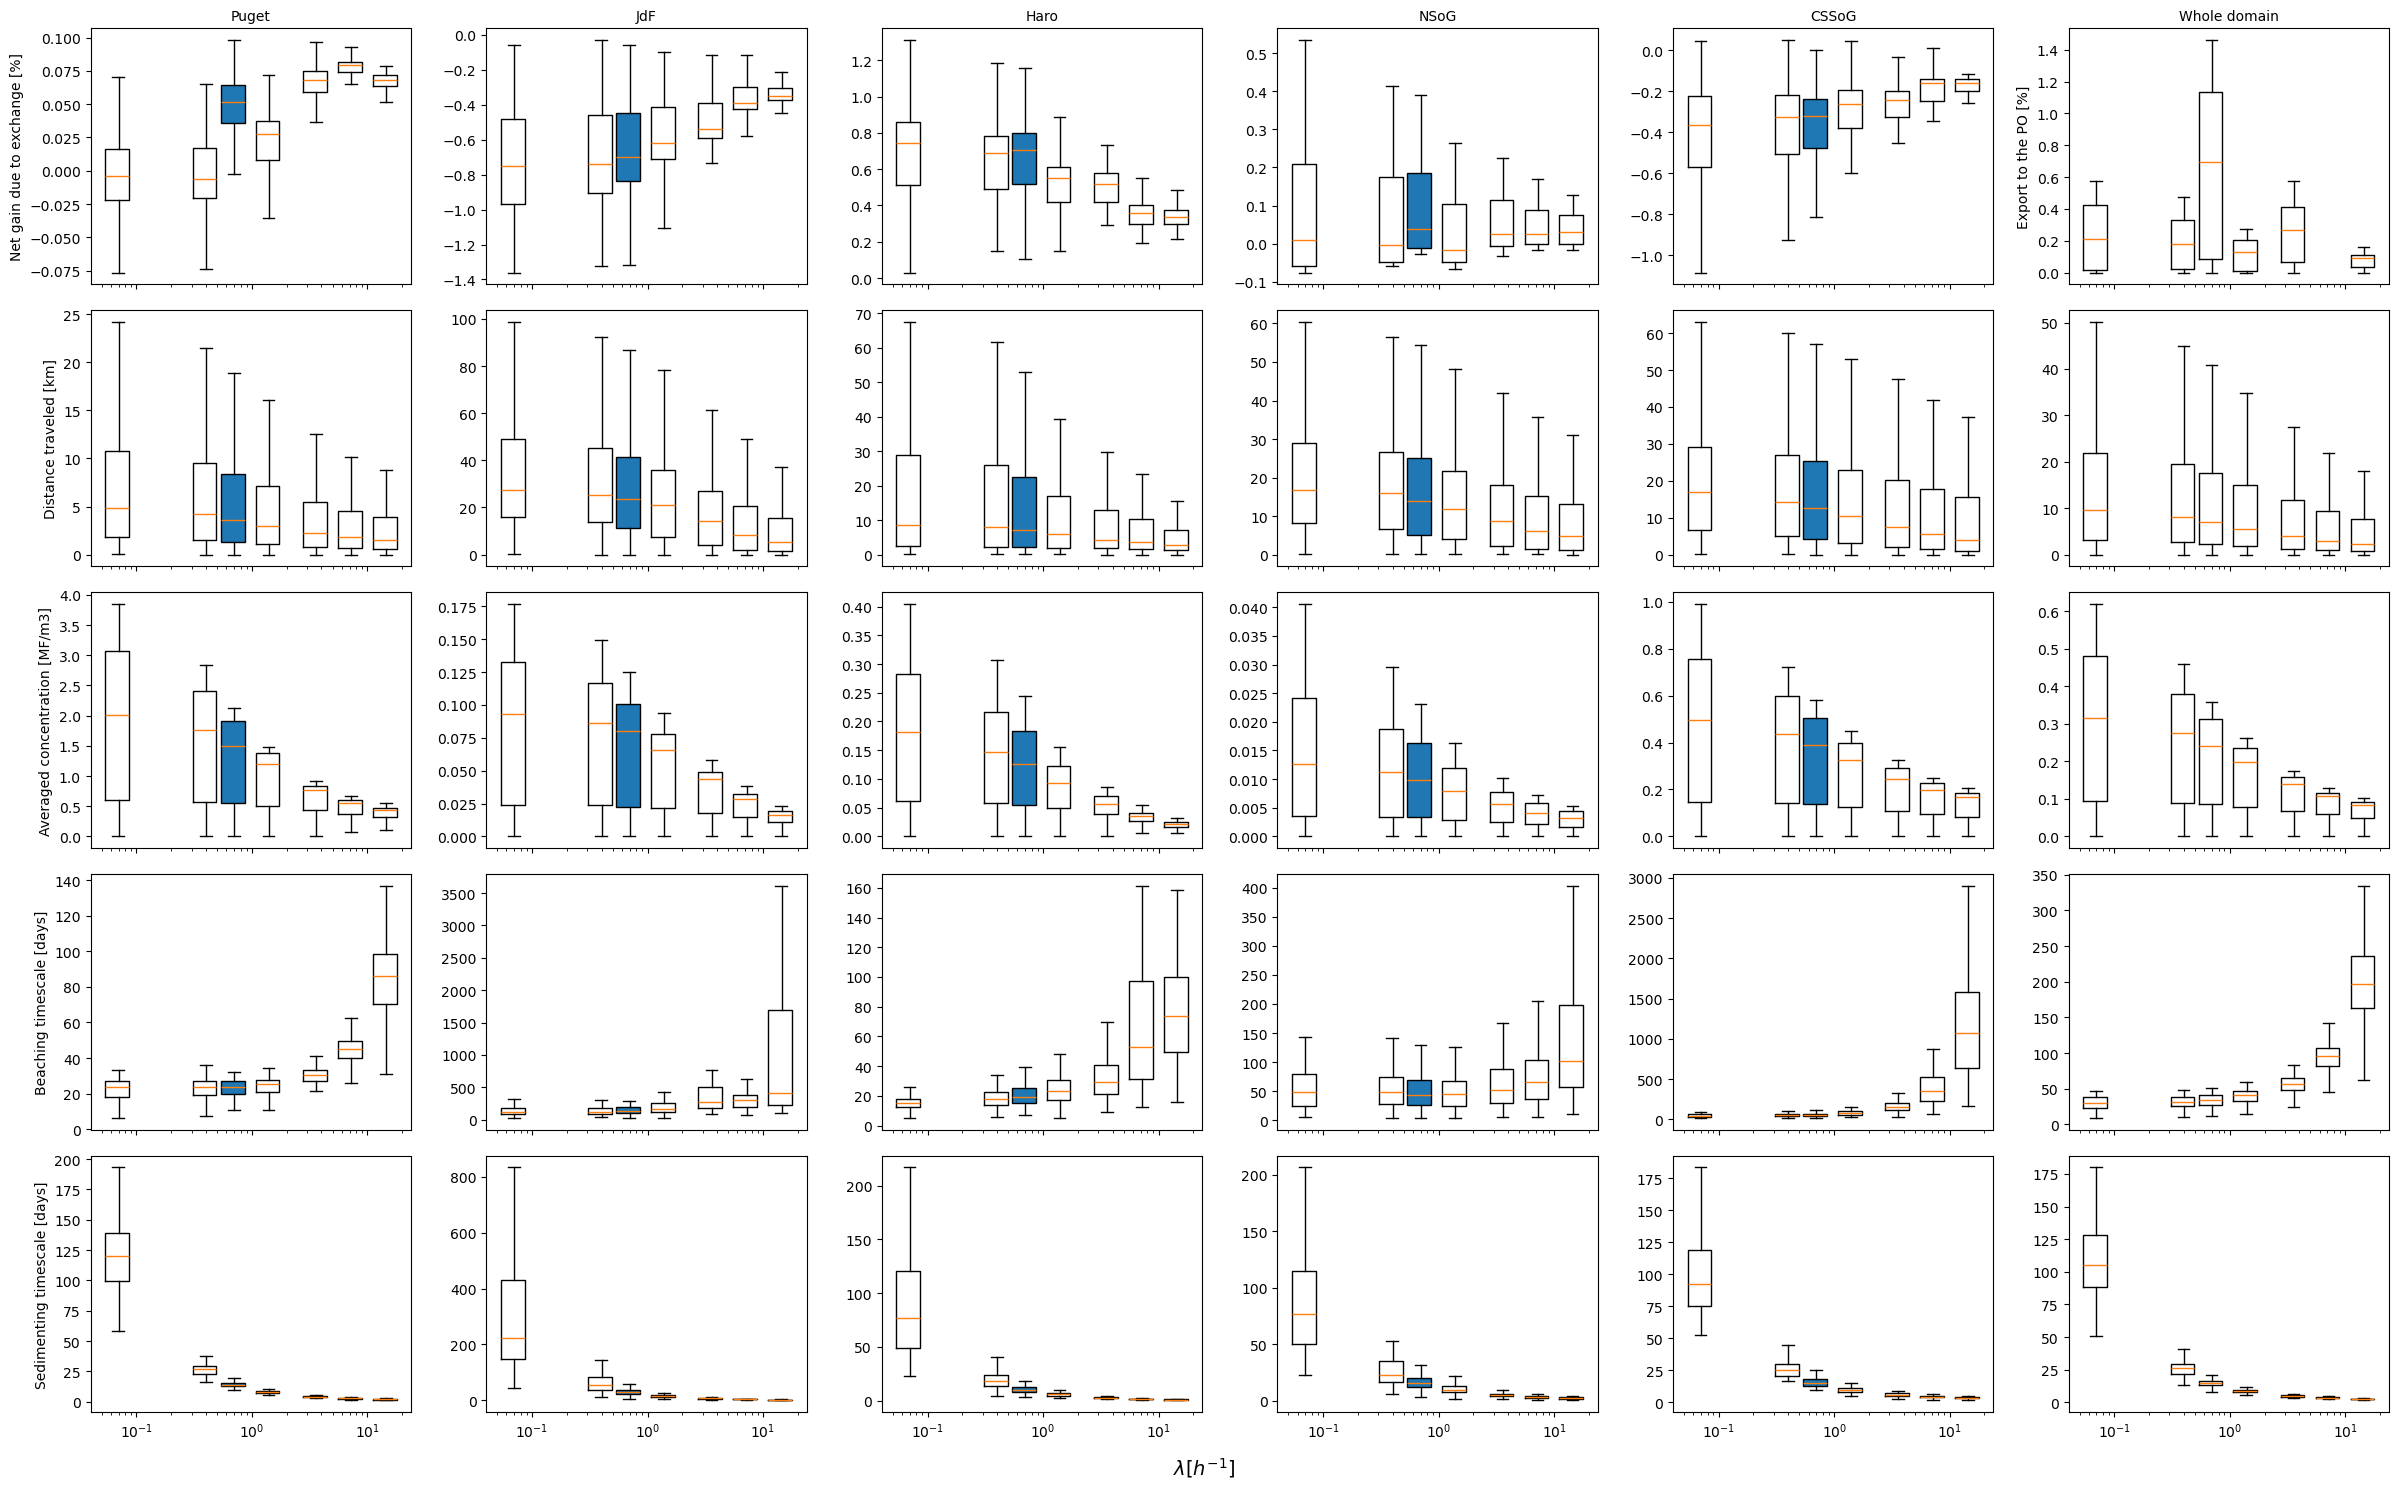

In [43]:
# ----------------------------
# Load REGION arrays
# ----------------------------
array1 = np.load('exchange_lambda.npy')*100
array2 = np.load('distance_travelled_lambda2.npy')/1000
array3 = np.load('suspended_lambdas.npy')*2e7
array4 = np.load('beached_lambdas.npy')
array5 = np.load('sediments_lambdas.npy')

data_arrays = [array1, array2, array3, array4, array5]

variables = [
    'Net gain due to exchange [%]',
    'Distance traveled [km]',
    'Averaged concentration [MF/m3]',
    'Beaching timescale [days]',
    'Sedimenting timescale [days]'
]

months = ['Jan','Feb','Mar','Apr','Jun','Jul','Aug']

# ----------------------------
# Load WHOLE-DOMAIN arrays
# ----------------------------
w_array1 = np.load('Exported_lambdas.npy')[:,:,1]* 100 #Select JdF box(only with non zero)
w_array2 = np.load('distance_travelled_lambda2.npy')/1000
#w_array3 = np.load('suspended_lambdas_w.npy') * 1e7
w_array4 = np.load('beached_lambdas_w.npy')
w_array5 = np.load('sediments_lambdas_w.npy')

domain_arrays = [w_array1, w_array2, w_array3, w_array4, w_array5]

# ----------------------------
# Plotting setup
# ----------------------------
n_months = len(months)
n_vars = len(data_arrays)
n_regions = len(sub_areas)

# one extra column at index 0 for whole-domain
fig, axs = plt.subplots(
    n_vars, n_regions + 1,
    figsize=(4*(n_regions+1), 3*n_vars),
    sharex="col"
)

# ensure 2D
if n_vars == 1:
    axs = np.expand_dims(axs, 0)
if n_regions + 1 == 1:
    axs = np.expand_dims(axs, 1)

# ----------------------------
# 1) Plot WHOLE-DOMAIN in column 0
# ----------------------------
for v, whole_array in enumerate(domain_arrays):

    ax = axs[v, 5]   # col 0 reserved for whole domain

    for m,im in enumerate(lambdas):
        data = whole_array[:, m]
        if im == '3,600 s':
            Filled = False
        else:
            Filled = False
        if v in (1, 3, 4):
            data = data[data > 0]

        data = data[~np.isnan(data)]

        ax.boxplot(data, positions=[lambdas[im]], widths=width(lambdas[im],w), showfliers=False,patch_artist=Filled)
        ax.set_xscale('log')
    if v==0:
        ax.set_ylabel('Export to the PO [%]')
    # title for whole-domain column
    if v == 0: 
        ax.set_title("Whole domain", fontsize=10)

# ----------------------------
# 2) Plot REGIONAL data in columns 1…N
# ----------------------------
for v, var_array in enumerate(data_arrays):
    for r, region_name in enumerate(sub_areas):

        ax = axs[v, r]   # shift by +1 to leave column 0 for domain

        for m,im in enumerate(lambdas):
            data = var_array[:, m, r]
            if im == '3,600 s':
                Filled = True
            else:
                Filled = False
            if v in (1, 3, 4):
                data = data[data > 0]

            data = data[~np.isnan(data)]
            if variables[v] == 'Distance traveled [km]':
                print(f'{region_name}, {np.mean(data)}')
            ax.boxplot(data, positions=[lambdas[im]], widths=width(lambdas[im],w), showfliers=False,patch_artist=Filled)
            ax.set_xscale('log')
        if r==0:
            ax.set_ylabel(variables[v])
        # column titles only on top row
        if v == 0:
            ax.set_title(region_name, fontsize=10)

fig.supxlabel(r'$\lambda [h^{-1}]$', fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()
#fig.savefig('lambdas_robustness.pdf')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fedc157ba50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedc1538e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fedc157b310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fedc1539d90>],
 'fliers': [],
 'means': []}

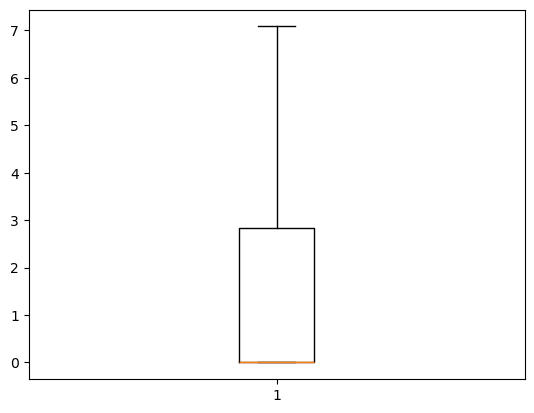

In [50]:
plt.boxplot(w_array2[:,4,0],showfliers=False)

In [ ]:
import numpy as np
exchange_array=np.load('Exported_array.npy')

print('Mean % exported everyday PO  from ', np.mean(exchange_array[:90,:,1])*100)
print('Std % Exported everyday to PO from ', np.std(exchange_array[:90,:,1])*100)

Mean % exported everyday PO  from  0.13282753751104567
Std % Exported everyday to PO from  0.11062382745943497


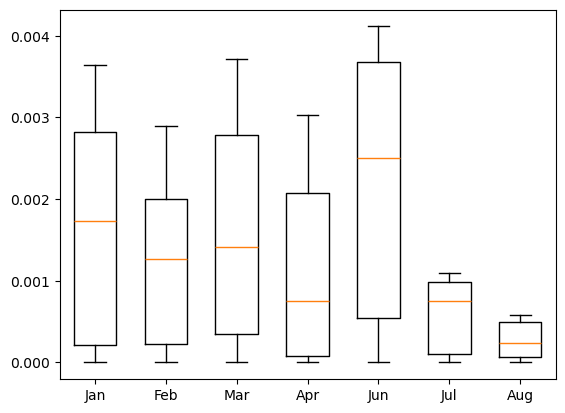

In [ ]:
for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
    data = exchange_array[:,i,1]
    data = data[~np.isnan(data)]           # remove invalid values
    plt.boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('suspended_all.npy')
print('Mean water column from all domain', np.nanmean(exchange_array[:,:].flatten())*100)
print('Std water column from all domain', np.nanstd(exchange_array[:,:].flatten())*100)

Mean water column from all domain 54.2455550560483
Std water column from all domain 16.549225449157365


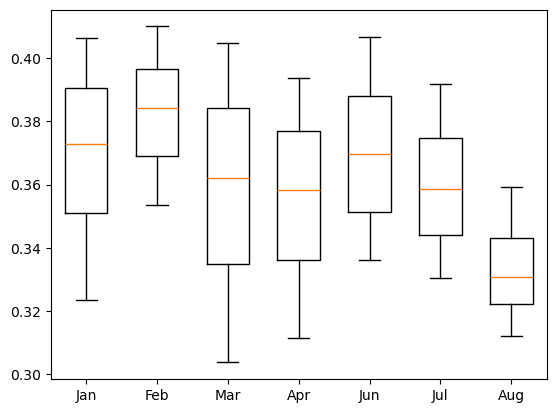

In [ ]:
for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
    data = exchange_array[90:,i]
    data = data[~np.isnan(data)]            # remove invalid values
    plt.boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('beached_all.npy')
print('Mean water column from all domain', np.nanmean(exchange_array[:,:].flatten())*100)
print('Std water column from all domain', np.nanstd(exchange_array[:,:].flatten())*100)

Mean water column from all domain 14.482796779815876
Std water column from all domain 4.3797090594906445


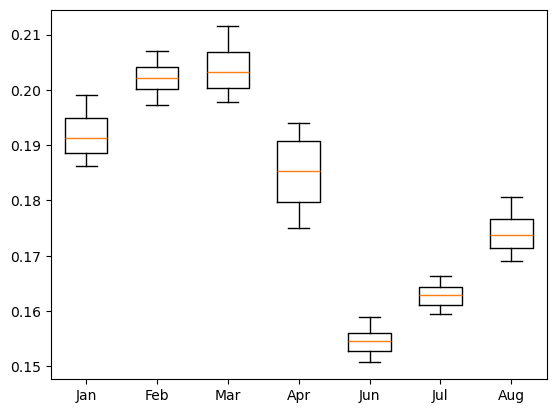

In [ ]:
for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
    data = exchange_array[90:,i]
    data = data[~np.isnan(data)]            # remove invalid values
    plt.boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('sedimented_all.npy')
print('Mean water column from all domain', np.nanmean(exchange_array[:,:].flatten())*100)
print('Std water column from all domain', np.nanstd(exchange_array[:,:].flatten())*100)

Mean water column from all domain 31.14671009160746
Std water column from all domain 12.530809647114408


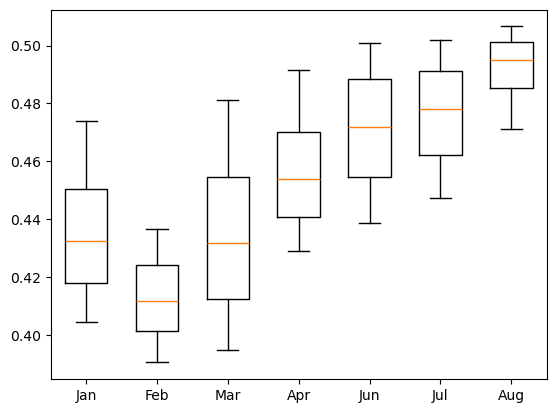

In [ ]:
for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
    data = exchange_array[90:,i]
    data = data[~np.isnan(data)]           # remove invalid values
    plt.boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('suspend_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean water column from '+sub_areass, np.nanmean(exchange_array[:,:,i].flatten())*100)
    print('Std water column from '+sub_areass, np.nanstd(exchange_array[:,:,i].flatten())*100)

Mean water column from Puget 23.490044044554732
Std water column from Puget 7.836980929501913
Mean water column from JdF 3.1702953357334875
Std water column from JdF 0.8725191489114561
Mean water column from Haro 1.6966386370141042
Std water column from Haro 0.5636883255458661
Mean water column from NSoG 0.9245709036900776
Std water column from NSoG 0.2282046627614131
Mean water column from CSSoG 24.964006135055904
Std water column from CSSoG 7.200958120821989


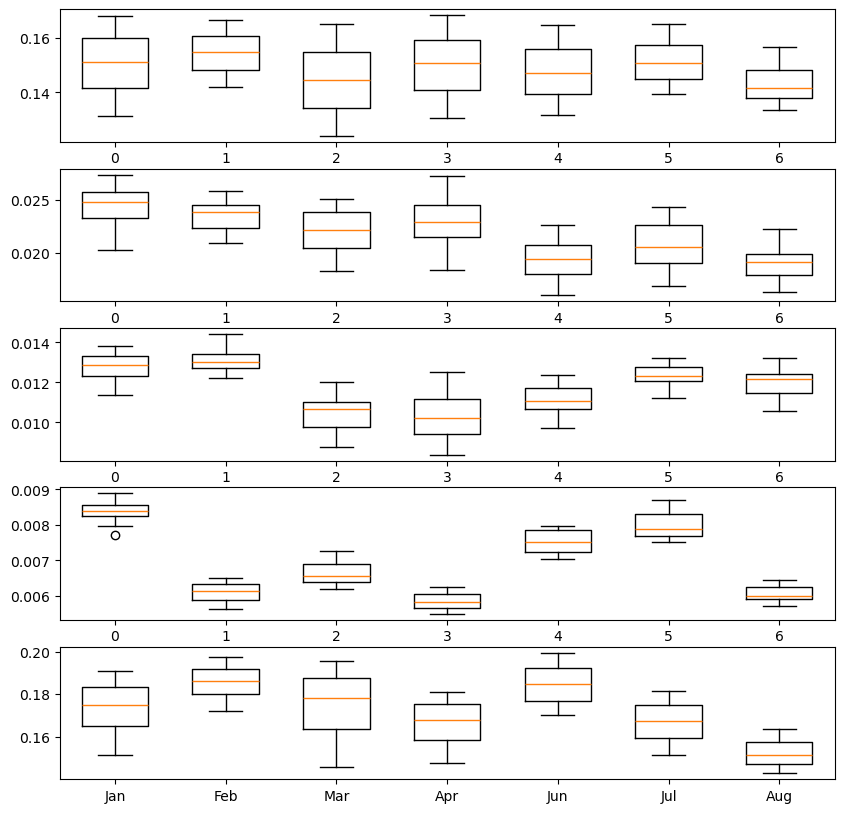

In [ ]:
fig,axs = plt.subplots(5,1,figsize=(10,10))
for j,sub_areass in enumerate(sub_areas):
    for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
        data = exchange_array[90:,i,j]
        data = data[~np.isnan(data)]          # remove invalid values
        axs[j].boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('exchange_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean exchanged from '+sub_areass, np.nanmean(exchange_array[:,:,i].flatten())*100)
    print('Std exchanged from '+sub_areass, np.nanstd(exchange_array[:,:,i].flatten())*100)

Mean exchanged from Puget 0.06347702050401173
Std exchanged from Puget 0.022222212837985488
Mean exchanged from JdF -0.8263995819818645
Std exchanged from JdF 0.40518217448746624
Mean exchanged from Haro 0.7444628674005108
Std exchanged from Haro 0.3347323241649543
Mean exchanged from NSoG 0.07096175951202267
Std exchanged from NSoG 0.13020764825612885
Mean exchanged from CSSoG -0.052502065434680736
Std exchanged from CSSoG 0.2322425742749408


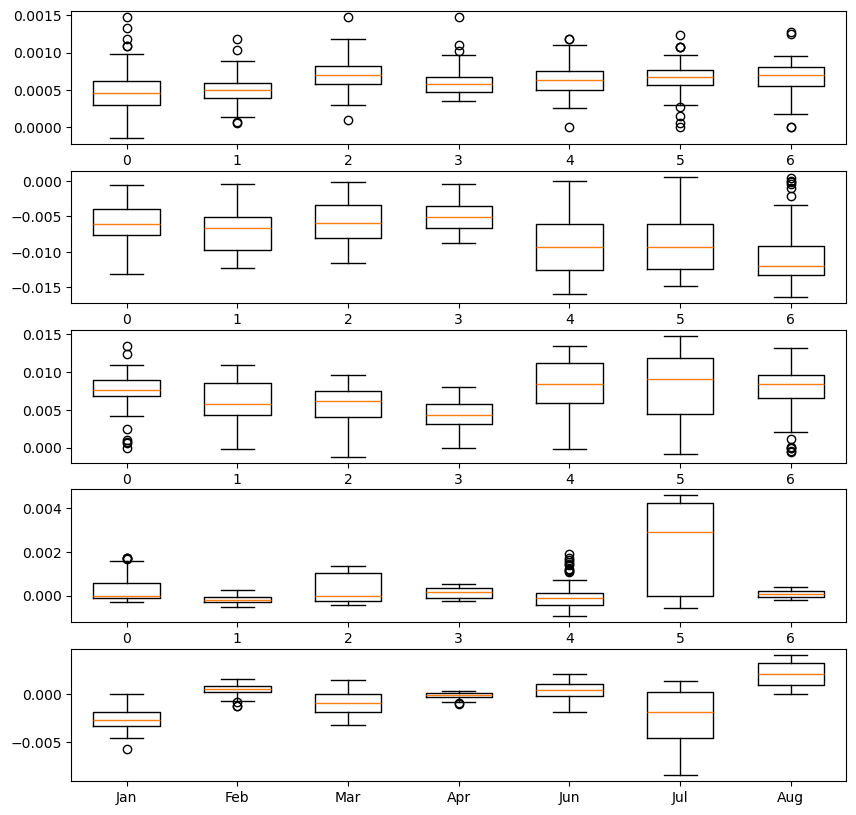

In [ ]:
fig,axs = plt.subplots(5,1,figsize=(10,10))
for j,sub_areass in enumerate(sub_areas):
    for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
        data = exchange_array[:90,i,j]
        data = data[~np.isnan(data)]          # remove invalid values
        axs[j].boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan','Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('sedimented_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean sedimented from '+sub_areass, np.nanmean(exchange_array[:,:,i].flatten())*100)
    print('Std sedimented from '+sub_areass, np.nanstd(exchange_array[:,:,i].flatten())*100)

Mean sedimented from Puget 13.27868399329094
Std sedimented from Puget 5.379626693310087
Mean sedimented from JdF 1.100916816545875
Std sedimented from JdF 0.41388853496600597
Mean sedimented from Haro 1.5163354412587853
Std sedimented from Haro 0.565874500692431
Mean sedimented from NSoG 0.49841506423309173
Std sedimented from NSoG 0.22544029314972347
Mean sedimented from CSSoG 14.752358776278768
Std sedimented from CSSoG 6.0640312293193155


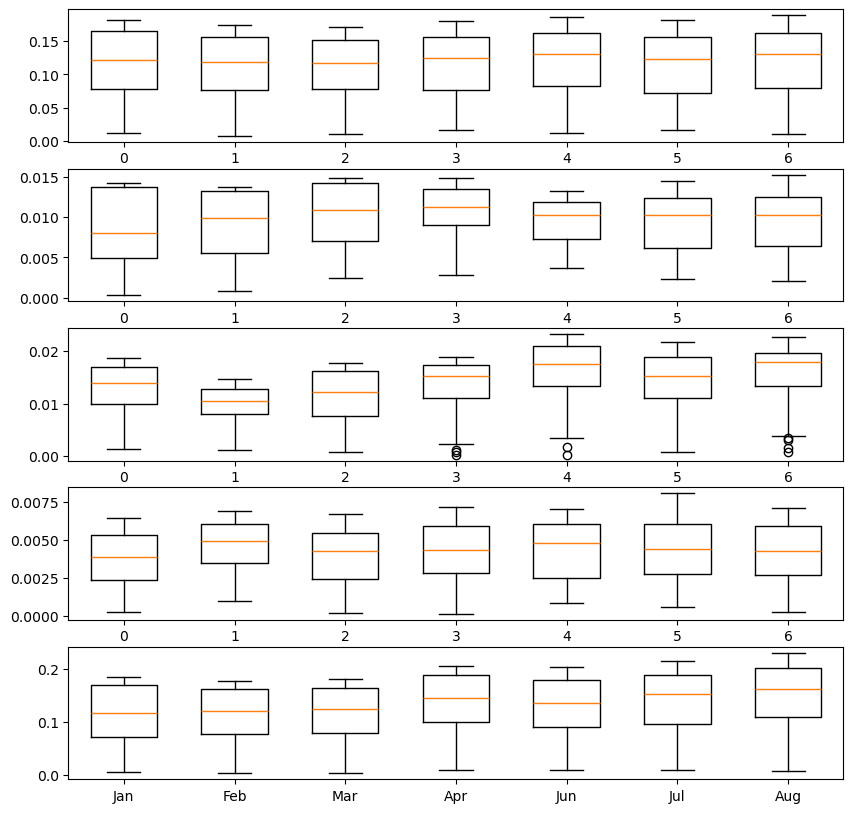

In [ ]:
fig,axs = plt.subplots(5,1,figsize=(10,10))
for j,sub_areass in enumerate(sub_areas):
    for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
        data = exchange_array[:90,i,j]
        data = data[~np.isnan(data)]          # remove invalid values
        axs[j].boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan','Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

In [ ]:
exchange_array=np.load('beached_array.npy')
for i,sub_areass in enumerate(sub_areas):
    print('Mean beached from '+sub_areass, np.nanmean(exchange_array[:,:,i].flatten())*100)
    print('Std beached from '+sub_areass, np.nanstd(exchange_array[:,:,i].flatten())*100)

Mean beached from Puget 9.878915099153383
Std beached from Puget 2.561464932713546
Mean beached from JdF 0.19573288652707213
Std beached from JdF 0.08988745013093935
Mean beached from Haro 0.741147210800177
Std beached from Haro 0.2836623014677024
Mean beached from NSoG 0.23798870144734804
Std beached from NSoG 0.05812991170865924
Mean beached from CSSoG 3.4290128818878927
Std beached from CSSoG 1.6257676352496415


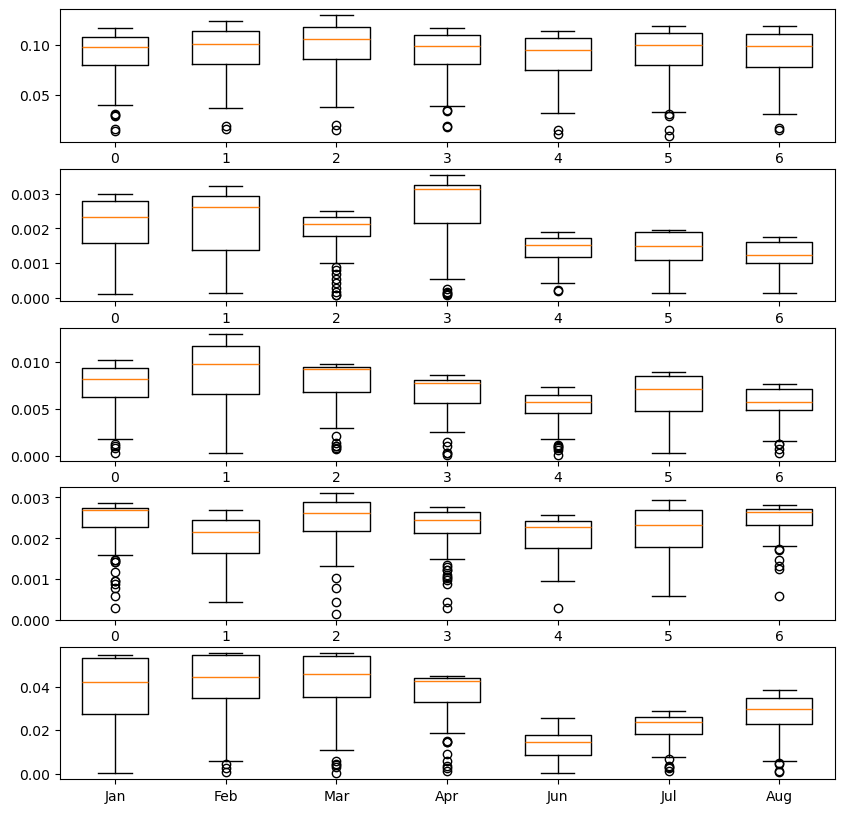

In [ ]:
fig,axs = plt.subplots(5,1,figsize=(10,10))
for j,sub_areass in enumerate(sub_areas):
    for i, label in enumerate(['Jan', 'Feb','Mar','Apr','Jun','Jul','Aug']):
        data = exchange_array[:90,i,j]
        data = data[~np.isnan(data)]          # remove invalid values
        axs[j].boxplot(data, positions=[i], widths=0.6)

plt.xticks([0, 1,2,3,4,5,6], ['Jan','Feb','Mar','Apr','Jun','Jul','Aug'])
plt.show()

### This checks budget vs $\alpha$

In [ ]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(runs):
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/runs[alpha][1]),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*1e7/runs[alpha][1]-(np.array(depcount)+1)*deploys*1e7/runs[alpha][1])/(np.array(timer)))[-40:]
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

KeyboardInterrupt: 

In [ ]:
lambdas = {'180 s':14.5,'360 s':7.23,'720 s':3.6,'1,800 s':1.4,'3,600 s':0.7,'6,120 s':0.4,'36,000 s':0.07}

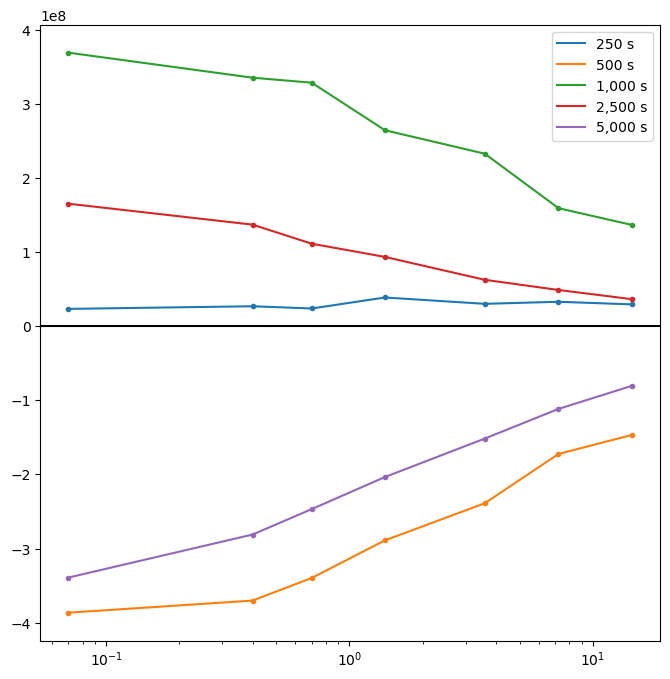

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
plt.plot(np.array(list(lambdas.values())),meanll,linestyle='-',marker='.')
plt.xscale('log')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,runs, loc = 'upper right')

In [ ]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

In [ ]:
np.sum(np.array(meanll).T,axis=0)

array([ 4.54747351e-13, -5.11590770e-13,  1.70530257e-13,  1.25055521e-12,
       -9.09494702e-13,  4.54747351e-13])

NameError: name 'meanll' is not defined

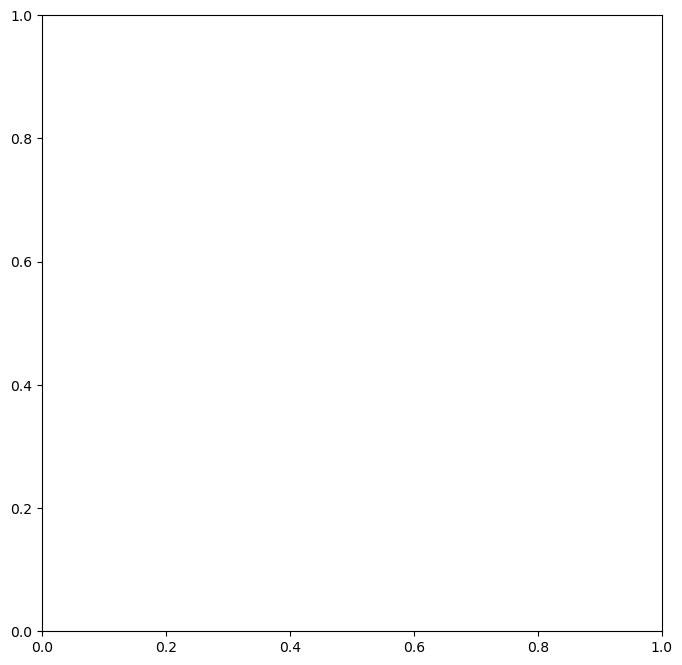

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [ ]:
np.array(meanll).T[0]*13.7

array([3466.42136883, 3478.64083237, 4856.94857663, 4662.21611603,
       4591.1638094 , 4777.09947575])

In [ ]:
sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']

In [ ]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting(Source,area).deploy.sum()
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

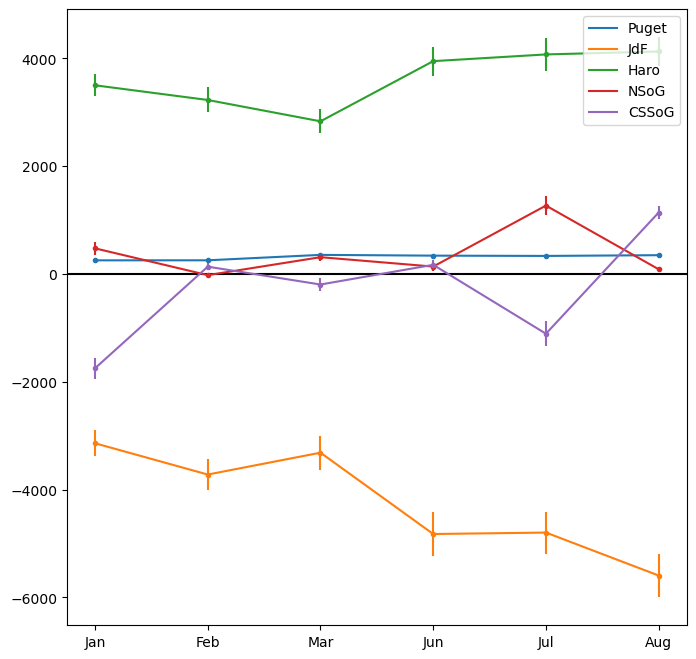

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

Parker's 2021 flow

In [ ]:
meane = 40.9e3
df = 4.7e3
exch= np.linspace(meane+df,meane-df,8)
exch
#exch= list(exch[:3])+list(exch[-3:])
#np.array(meanll).T[0]*13.7/(np.array(exch))

array([45600.        , 44257.14285714, 42914.28571429, 41571.42857143,
       40228.57142857, 38885.71428571, 37542.85714286, 36200.        ])

In [ ]:
ii,jj = finder(jjii,48.145078973929365, -122.75094025918668)

In [ ]:
lim=10

for month in months:
    conc1 = np.load(path_runs+months[month][0].split('.')[0]+'.npy')*13.7
    limdep = mask.gdept_0[0,:,0,0].values
    limn = np.where(limdep>lim)[0][0]-1
    zdep = round(limdep[limn],2)
    print(f'checking for depth = {zdep}')
    admirup = conc1[:limn,int(ii/3),:]
    admirdeep = conc1[limn:,int(ii/3),:]
    weightsup = mask.e3t_0[0,:limn,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:limn,int(ii/3),::3].values,axis=0)
    weightsdeep = mask.e3t_0[0,limn:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,limn:,int(ii/3),::3].values,axis=0)
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {month} upper vs lower {-np.average(admirup[mask.tmask[0,:limn,ii,::3]==1],weights=weightsup[mask.tmask[0,:limn,ii,::3]==1])+np.average(admirdeep[mask.tmask[0,limn:,ii,::3]==1],weights=weightsdeep[mask.tmask[0,limn:,ii,::3]==1])}')

checking for depth = 9.5
Difference in Jan upper vs lower 0.008828478460783773
checking for depth = 9.5
Difference in Feb upper vs lower 0.012019580577336708
checking for depth = 9.5
Difference in Mar upper vs lower 0.04418745082499492
checking for depth = 9.5
Difference in Jun upper vs lower 0.12019632437078806
checking for depth = 9.5
Difference in Jul upper vs lower 0.05280445116623003
checking for depth = 9.5
Difference in Aug upper vs lower 0.010593266971856585


In [ ]:
month = {'Jan':1,'Feb':2,'Mar':3,'Jun':6,'Jul':7,'Aug':8}
for m in month:
    v = xr.open_dataset('/results/SalishSea/month-avg.201905/'+'SalishSea_1m_20190'+str(month[m])+'_20190'+str(month[m])+'_grid_V.nc', decode_times=False).vomecrty
    conc1 = np.load(path_runs+months[m][0].split('.')[0]+'.npy')*13.7
    admir = conc1[:,int(ii/3),:]
    admirout = admir[v[0,:,int(ii/3),::3]>0]
    admirin= admir[v[0,:,int(ii/3),::3]<0]

    weights = mask.e3t_0[0,:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:,int(ii/3),::3].values,axis=0)
    weightsin = weights[v[0,:,int(ii/3),::3]<0]
    weightsout = weights[v[0,:,int(ii/3),::3]>0]
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {m} upper vs lower {np.average(admirin,weights=weightsin)+np.average(admirout,weights=weightsout)}')

Difference in Jan upper vs lower 0.01838382150202309
Difference in Feb upper vs lower 0.015560438154672085
Difference in Mar upper vs lower 0.029773328510979656
Difference in Jun upper vs lower 0.006782790973645338
Difference in Jul upper vs lower 0.02504564985799839
Difference in Aug upper vs lower 0.015739647896920093


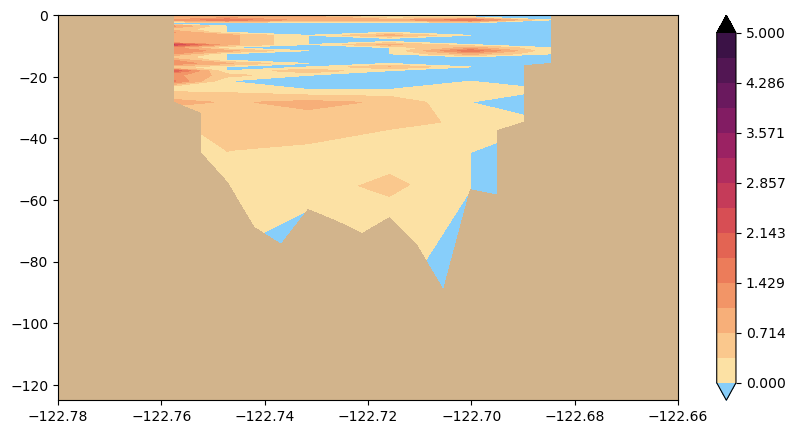

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
Ni = 3
levels = np.linspace(0, 5, 15)
Lon,Depth = np.meshgrid(coords.nav_lon[ii,::Ni],mask.gdept_0[0,:,ii,0])
Lon2,Depth = np.meshgrid(coords.nav_lon[ii,:],mask.gdept_0[0,:,ii,0])
#Lon,Depth = np.meshgrid(coords.nav_lat[::Ni,jj],mask.gdept_0[0,:,0,jj])
ac = plt.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni],conc1[:,int(ii/3),:],levels=levels,cmap=cmocean.cm.matter,extend='both')
#ac = plt.contourf(Lon,-mask.gdept_0[0,:,::Ni,jj],conc_winter[:,:,int(jj/3)],levels=levels,cmap=cmocean.cm.matter,extend='both')
ax.contourf(Lon2,-mask.gdept_0[0,:,ii,:], mask.tmask[0,:,ii,:], levels=[-0.01, 0.01], colors='tan')
ac.cmap.set_over('black')
ac.cmap.set_under('lightskyblue')
plt.ylim([-125,0])
plt.xlim([-122.78, -122.66])
plt.colorbar(ac)